# Clasificador de estrategias
## k shapes

In [123]:
import numpy as np
import pandas as pd
import matplotlib as plt
from math import sqrt
from yellowbrick.cluster import KElbowVisualizer
from statistics import stdev


In [124]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
#import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 

In [125]:
'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from keras.utils import to_categorical
from sklearn.metrics import adjusted_rand_score
import random

'''Algos'''
#from kshape.core import kshape, zscore
import tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import KShape, TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
#import hdbscan

In [126]:
# parameters
n = (252) # number of observation to choose


In [127]:
# Load the data
path = '/Archivos/MIDS/GitHub/models/PI_2/Features.csv'
#Archivos/MIDS/GitHub/models/PI_2/Features.csv
Features = pd.read_csv('Rentabilidad de estrategias base 100.csv', index_col=0)

In [128]:
Features.head(5)

,LA1,SA1,LSA1,LA101,SA101,LSA101,LA2,SA2,LSA2,LA3,...,LSA53,LA54,SA54,LSA54,LA6,SA6,LSA6,LAMAR,SAMAR,LSAMAR
Date,,,,,,,,,,,,,,,,,,,,,
2008-10-31,112.315749,101.786622,114.102371,114.322571,103.793443,118.116014,99.449679,88.920552,88.370231,104.354609,...,81.883986,96.206557,85.677429,81.883986,104.354609,93.825481,98.180090,96.206557,85.677429,81.883986
2008-11-03,108.673546,102.316747,110.996498,106.226580,100.349511,105.832219,100.307494,93.034200,93.220667,103.600199,...,90.399733,99.398751,91.744855,90.399733,103.600199,96.678447,100.455694,99.398751,91.744855,90.399733
2008-11-04,125.214699,88.014545,112.375738,127.844695,91.470217,118.005653,112.245048,76.940813,88.189179,119.390981,...,80.001433,108.193919,73.073908,80.001433,119.390981,83.184769,101.746311,108.193919,73.073908,80.001433
2008-11-05,99.808765,100.439696,105.439075,98.080355,101.646659,103.660622,96.722894,92.773882,94.141451,99.195744,...,89.726586,96.156896,90.086712,89.726586,99.195744,97.735318,102.333012,96.156896,90.086712,89.726586
2008-11-06,80.598195,117.785421,103.353926,75.685445,115.555927,94.176416,81.308015,111.866757,98.512300,79.377214,...,97.935928,82.998843,110.656415,97.935928,79.377214,113.898740,98.811468,82.998843,110.656415,97.935928


In [129]:
df = Features.tail(n)

In [130]:
# Basic summary statistics
data_train = df.T.values
print("Number of time series:", len(data_train))
print("Number of unique classes:", len(np.unique(data_train[:,0])))
print("Time series length:", len(data_train[0,1:]))

Number of time series: 27
Number of unique classes: 27
Time series length: 251


In [131]:
# Prepare the data - Scale
data_scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(data_train)
 

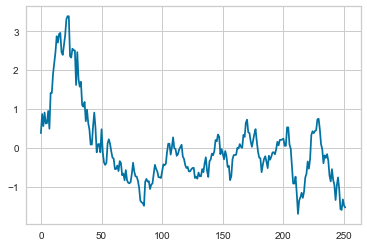

In [132]:
plt.plot(data_scaled[26 ,:,: ] )

In [133]:
X = data_scaled
distorsions = []
for k in range(2, 15):
    ks = KShape(n_clusters=k, max_iter=100, n_init=100,verbose=0).fit(X)
    distorsions.append(ks.inertia_)

Text(0.5, 1.0, 'Elbow curve')

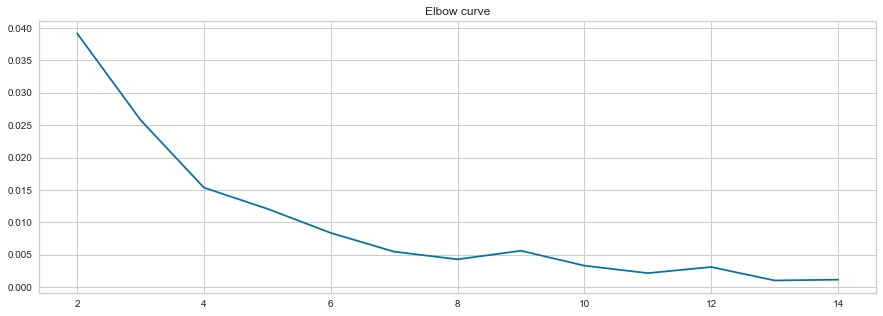

In [134]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [135]:
# correr el Kshapes con el k seleccionado

In [136]:
ks = KShape(n_clusters=4, max_iter=100, n_init=100,verbose=0).fit(X)
preds = ks.fit_predict(X)
  
print('\nCluster labels:')
print(ks.labels_)



Cluster labels:
[0 2 1 0 2 0 0 2 2 0 2 1 0 2 3 0 2 3 0 2 3 0 2 2 0 2 2]


In [137]:
# dataframe con las estrategias y con la asignacion a cada cluster

In [138]:
index =list(range(len(Features.columns)))
columns = ['strategies','clusters', 'selection']


results = pd.DataFrame(index=index, columns=columns)

results ['clusters'] = ks.labels_
results ['strategies'] = Features.columns
 

In [139]:
results

,strategies,clusters,selection
0,LA1,0,NaN
1,SA1,2,NaN
2,LSA1,1,NaN
3,LA101,0,NaN
4,SA101,2,NaN
5,LSA101,0,NaN
6,LA2,0,NaN
7,SA2,2,NaN
8,LSA2,2,NaN
9,LA3,0,NaN


In [140]:
sharpeclusters =[] 
Features = Features.tail(n)
for i in range(results['clusters'].nunique()):
    
    l = results.loc[results['clusters'] == i].index.values.astype(int).tolist()
    dfexp=Features.pct_change().iloc[: , l].sum(axis = 1, skipna = True)
    r = dfexp.mean()
    s = stdev(dfexp)
    
    sharpeclusters.append(r/s)
sharpeclusters = np.asanyarray(sharpeclusters)



In [141]:
selection = sharpeclusters.argmax()
cond = results['clusters'] == selection

results['selection'] = np.where(cond, 1, 0)

In [142]:
results['selection']

0     1
1     0
2     0
3     1
4     0
5     1
6     1
7     0
8     0
9     1
10    0
11    0
12    1
13    0
14    0
15    1
16    0
17    0
18    1
19    0
20    0
21    1
22    0
23    0
24    1
25    0
26    0
Name: selection, dtype: int32